# Assignment 02 Part 1: Perceptron Template

This file contains the template code for the Perceptron.

### Perceptron Class

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):

    #==========================================#
    # The init method is called when an object #
    # is created. It can be used to initialize #
    # the attributes of the class.             #
    #==========================================#
    def __init__(self, no_inputs, max_iterations= 1, learning_rate=0.01,initialisation = 'unif'):
        self.no_inputs = no_inputs
 #       self.weights = (np.random.rand(no_inputs) - 0.5)*(initialisation == 'unif') + (np.random.rand(no_inputs) - 0.5)*(initialisation == 'unif')
        self.bias = 1
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        if initialisation == 'unif':
            self.weights = (np.random.rand(no_inputs) - 0.5)
        elif initialisation == 'normal':
            self.weights = np.random.normal(0,np.sqrt(32/(no_inputs+1)),no_inputs)

    #=======================================#
    # Prints the details of the perceptron. #
    #=======================================#
    def print_details(self):
        print("No. inputs:\t" + str(self.no_inputs))
        print("Max iterations:\t" + str(self.max_iterations))
        print("Learning rate:\t" + str(self.learning_rate))

    #=========================================#
    # Performs feed-forward prediction on one #
    # set of inputs.                          #
    #=========================================#
    def predict(self, inputs):
        if self.calculate(inputs,self.bias,self.weights) > 0:            
            return 1         
        else:
            return 0
    
    def predict_sigmoid(self,inputs):
        if self.calculate(inputs,self.bias,self.weights) >= 10:
            return 1 
        elif self.calculate(inputs,self.bias,self.weights) <= -10:
            return 0
        else:
            return 1 / (1 + np.exp(-self.calculate(inputs,self.bias,self.weights)))
        
        
    def calculate(self,X,b,w):
        return X.dot(w) + b
        
    #======================================#
    # Trains the perceptron using labelled #
    # training data.                       #
    #======================================#
    def train(self, X, y):
        assert len(X) == len(y)
        for i in range(X.shape[0]):
            
            Xi = X[i]
            yi = y[i]
            activation = self.calculate(Xi,self.bias,self.weights)
            self.weights = self.weights + self.learning_rate*(yi-np.sign(activation))*Xi
            self.bias = self.bias + self.learning_rate*(yi-np.sign(activation))
            if (i+1) % 10000 == 0:
                print('Batch',(i+1) //10000)
                self.test(X,y)
                print('\n')
        
    #======================================#
    # 1.3 Batch training implementation    #                        
    #======================================#
    
    def batch_train(self, X, y):
        assert len(X) == len(y)        
        for iteration in range(self.max_iterations):           
            for i in range(X.shape[0]):    
                Xi = X[i]
                yi = y[i]
                activation = self.calculate(Xi,self.bias,self.weights)
                self.weights = self.weights + self.learning_rate*(yi-np.sign(activation))*Xi
                self.bias = self.bias + self.learning_rate*(yi-np.sign(activation))
                if (i+1) % 10000 == 0:
                    print('Batch',(i+1)//10000 + iteration*6)
                    self.test(X,y)
                    print('\n')
                
    #=========================================#
    # Tests the prediction on each element of #
    # the testing data. Prints the precision, #
    # recall, and accuracy of the perceptron. #
    #=========================================#
    def test(self, testing_data, labels):
        assert len(testing_data) == len(labels)
        accuracy = 0.0
        precision = 0.0
        recall = 0.0
        TN = TP = FN = FP = 0  
        for i in range(testing_data.shape[0]):
            if labels[i] != 1:
                if self.calculate(testing_data[i],self.bias,self.weights) > 0:
                    FP += 1
                else:
                    TN += 1
            else:
                if self.calculate(testing_data[i],self.bias,self.weights) >0:   
                    TP += 1
                else:
                    FN += 1
                    
        accuracy = (TN + TP)/(TN + TP + FP + FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        print("Accuracy:\t"+str(accuracy))
        print("Precision:\t"+str(precision))
        print("Recall:\t"+str(recall))
        print('TP:',TP,'TN:',TN,'FP:',FP,'FN:',FN)
        return accuracy,precision,recall
     
    #=========================================#
    # Printing function whose default is set  #
    # to print the weights matrix of the Per- #
    # ceptron, can be switched to print MNIST #
    # digits.                                 #                  
    #=========================================#
    def show(self,pic = None):
        if pic is not None:
            plt.imshow(pic.reshape(28,28), cmap='gray')
        
        else:
            weights = self.weights.reshape(28,28) 
            plt.imshow(weights, cmap='gray')

### Main

The following cell(s) should complete parts 1.1 to 1.5.

## 1.1 Implementation of Perceptron
### Initialising a perceptron instance
### Loading data and modifying labels for binary classifcation

In [2]:
p = Perceptron(784,learning_rate = 0.01)
p.print_details()

No. inputs:	784
Max iterations:	1
Learning rate:	0.01


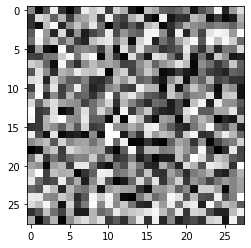

In [3]:
# Initial random weights matrix visualisation
p.show()

In [4]:
import pandas as pd
import numpy as np
train = pd.read_csv(r'D:\Jupyter Notebooks\Course semester 2\DP and NN\Assignment2\mnist_train.csv',header = None)
train_data = train.values.copy()
for i in range(train.shape[0]):   
    if train_data[i][0] != 7:     # Labels of non-7s changed to -1 
        train_data[i][0] = -1      
    else:
        train_data[i][0] = 1      # Labels of non-7s changed to 1 
train_label = train_data.T[0]     # Get the training labels 
train_data = train_data[:,1:]     # Get the training data

test = pd.read_csv(r'D:\Jupyter Notebooks\Course semester 2\DP and NN\Assignment2\mnist_test.csv',header = None)
test_data = test.values.copy()
for i in range(test.shape[0]):   
    if test_data[i][0] != 7:     # Labels of non-7s changed to -1 
        test_data[i][0] = -1      
    else:
        test_data[i][0] = 1      # Labels of non-7s changed to 1 
test_label = test_data.T[0]     # Get the testing labels 
test_data = test_data[:,1:]     # Get the testing data

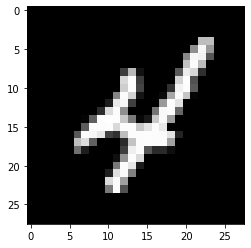

In [5]:
# Show one of the digits
p.show(train_data[9])

In [6]:
%%time
p.train(train_data,train_label)    

Batch 1
Accuracy:	0.9736666666666667
Precision:	0.9695329725395871
Recall:	0.7720670391061453
TP: 4837 TN: 53583 FP: 152 FN: 1428


Batch 2
Accuracy:	0.9719333333333333
Precision:	0.9426086956521739
Recall:	0.7786113328012769
TP: 4878 TN: 53438 FP: 297 FN: 1387


Batch 3
Accuracy:	0.9720166666666666
Precision:	0.9225949133800221
Recall:	0.7990422984836393
TP: 5006 TN: 53315 FP: 420 FN: 1259


Batch 4
Accuracy:	0.9791166666666666
Precision:	0.9234538695505238
Recall:	0.8723064644852354
TP: 5465 TN: 53282 FP: 453 FN: 800


Batch 5
Accuracy:	0.9806
Precision:	0.909193004973528
Recall:	0.9045490822027135
TP: 5667 TN: 53169 FP: 566 FN: 598


Batch 6
Accuracy:	0.9818
Precision:	0.9478787878787879
Recall:	0.8737430167597765
TP: 5474 TN: 53434 FP: 301 FN: 791


Wall time: 4.89 s


In [7]:
p.test(test_data,test_label)

Accuracy:	0.9819
Precision:	0.9500531349628055
Recall:	0.8696498054474708
TP: 894 TN: 8925 FP: 47 FN: 134


(0.9819, 0.9500531349628055, 0.8696498054474708)

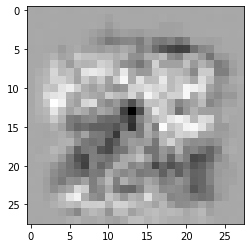

In [8]:
# Weights matrix after training. Some patterns seem to show up 
p.show()

In [9]:
# Initialising weights matrix from Normal Distribution
p_normal = Perceptron(784,learning_rate = 0.01,initialisation = 'normal')
p_normal.print_details()

No. inputs:	784
Max iterations:	1
Learning rate:	0.01


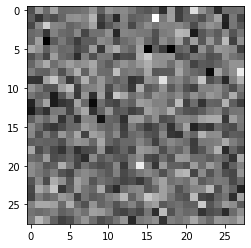

In [10]:
# VIsualising weights matrix
p_normal.show()

In [11]:
p_normal.train(train_data,train_label)   

Batch 1
Accuracy:	0.9802333333333333
Precision:	0.9241690329046267
Recall:	0.8831604150039905
TP: 5533 TN: 53281 FP: 454 FN: 732


Batch 2
Accuracy:	0.9808333333333333
Precision:	0.9091345384738442
Recall:	0.9071029529130088
TP: 5683 TN: 53167 FP: 568 FN: 582


Batch 3
Accuracy:	0.97665
Precision:	0.9574868322046651
Recall:	0.8124501197126895
TP: 5090 TN: 53509 FP: 226 FN: 1175


Batch 4
Accuracy:	0.9807333333333333
Precision:	0.9409632314862766
Recall:	0.870071827613727
TP: 5451 TN: 53393 FP: 342 FN: 814


Batch 5
Accuracy:	0.9699166666666666
Precision:	0.7993288590604026
Recall:	0.9505187549880287
TP: 5955 TN: 52240 FP: 1495 FN: 310


Batch 6
Accuracy:	0.9823666666666667
Precision:	0.9413459908459061
Recall:	0.8863527533918595
TP: 5553 TN: 53389 FP: 346 FN: 712




In [12]:
# Seems to perform on a par with uniform distribution weights matrix
p_normal.test(test_data,test_label)

Accuracy:	0.9828
Precision:	0.9505263157894737
Recall:	0.8784046692607004
TP: 903 TN: 8925 FP: 47 FN: 125


(0.9828, 0.9505263157894737, 0.8784046692607004)

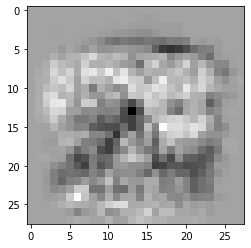

In [13]:
# Final weights matrix seems similiar 
p_normal.show()

## 1.2 Batch Learning

In [14]:
p_batch = Perceptron(784,learning_rate = 0.01,max_iterations = 2)
p_batch.print_details()

No. inputs:	784
Max iterations:	2
Learning rate:	0.01


In [15]:
p_batch.batch_train(train_data,train_label)

Batch 1
Accuracy:	0.9760333333333333
Precision:	0.9528992306248827
Recall:	0.8105347166799681
TP: 5078 TN: 53484 FP: 251 FN: 1187


Batch 2
Accuracy:	0.9746833333333333
Precision:	0.9506266616027346
Recall:	0.7990422984836393
TP: 5006 TN: 53475 FP: 260 FN: 1259


Batch 3
Accuracy:	0.9782833333333333
Precision:	0.9484815618221258
Recall:	0.8375099760574621
TP: 5247 TN: 53450 FP: 285 FN: 1018


Batch 4
Accuracy:	0.9784666666666667
Precision:	0.8888193901485536
Recall:	0.9072625698324023
TP: 5684 TN: 53024 FP: 711 FN: 581


Batch 5
Accuracy:	0.9814833333333334
Precision:	0.9390119250425895
Recall:	0.8798084596967278
TP: 5512 TN: 53377 FP: 358 FN: 753


Batch 6
Accuracy:	0.98155
Precision:	0.955975954738331
Recall:	0.863048683160415
TP: 5407 TN: 53486 FP: 249 FN: 858


Batch 7
Accuracy:	0.9783333333333334
Precision:	0.9656724817107485
Recall:	0.82170790103751
TP: 5148 TN: 53552 FP: 183 FN: 1117


Batch 8
Accuracy:	0.9739833333333333
Precision:	0.8249516441005803
Recall:	0.9530726256983241


In [16]:
# The second batch barely improves results.
# The result does not look better than single batch training.
p_batch.test(test_data,test_label)

Accuracy:	0.9808
Precision:	0.9418604651162791
Recall:	0.8667315175097277
TP: 891 TN: 8917 FP: 55 FN: 137


(0.9808, 0.9418604651162791, 0.8667315175097277)

In [17]:
# Try batches range from 1 to 5, to see performance 
# Accuracy reaches highest score of 98.36% at the third batch
acc = []
pre = []
rec = []
p = Perceptron(28*28,learning_rate = 0.01)
p.print_details()
print('\n')
for i in range(10):
    print('Epoch:',i+1)
    p.train(train_data,train_label)
    print('Test performance')
    accuracy,precision,recall = p.test(test_data,test_label)
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    print('\n')

No. inputs:	784
Max iterations:	1
Learning rate:	0.01


Epoch: 1
Batch 1
Accuracy:	0.9735166666666667
Precision:	0.9508291554184343
Recall:	0.7870710295291301
TP: 4931 TN: 53480 FP: 255 FN: 1334


Batch 2
Accuracy:	0.9762666666666666
Precision:	0.8493289074902584
Recall:	0.9393455706304868
TP: 5885 TN: 52691 FP: 1044 FN: 380


Batch 3
Accuracy:	0.97925
Precision:	0.927889532901466
Recall:	0.8687948922585794
TP: 5443 TN: 53312 FP: 423 FN: 822


Batch 4
Accuracy:	0.97785
Precision:	0.9582250278499814
Recall:	0.8237829209896249
TP: 5161 TN: 53510 FP: 225 FN: 1104


Batch 5
Accuracy:	0.97935
Precision:	0.8896124031007752
Recall:	0.9158818834796488
TP: 5738 TN: 53023 FP: 712 FN: 527


Batch 6
Accuracy:	0.98205
Precision:	0.9422093419706785
Recall:	0.8822027134876297
TP: 5527 TN: 53396 FP: 339 FN: 738


Test performance
Accuracy:	0.9817
Precision:	0.9470899470899471
Recall:	0.8706225680933852
TP: 895 TN: 8922 FP: 50 FN: 133


Epoch: 2
Batch 1
Accuracy:	0.9761833333333333
Precision:	0.9750491

Accuracy:	0.9841833333333333
Precision:	0.9271938283510125
Recall:	0.920830007980846
TP: 5769 TN: 53282 FP: 453 FN: 496


Batch 3
Accuracy:	0.98035
Precision:	0.9672914369717016
Recall:	0.8402234636871508
TP: 5264 TN: 53557 FP: 178 FN: 1001


Batch 4
Accuracy:	0.98095
Precision:	0.9664845173041894
Recall:	0.846927374301676
TP: 5306 TN: 53551 FP: 184 FN: 959


Batch 5
Accuracy:	0.9793333333333333
Precision:	0.8687802730074857
Recall:	0.9447725458898644
TP: 5919 TN: 52841 FP: 894 FN: 346


Batch 6
Accuracy:	0.9746
Precision:	0.973059269606865
Recall:	0.7782920989624901
TP: 4876 TN: 53600 FP: 135 FN: 1389


Test performance
Accuracy:	0.975
Precision:	0.9675480769230769
Recall:	0.7830739299610895
TP: 805 TN: 8945 FP: 27 FN: 223




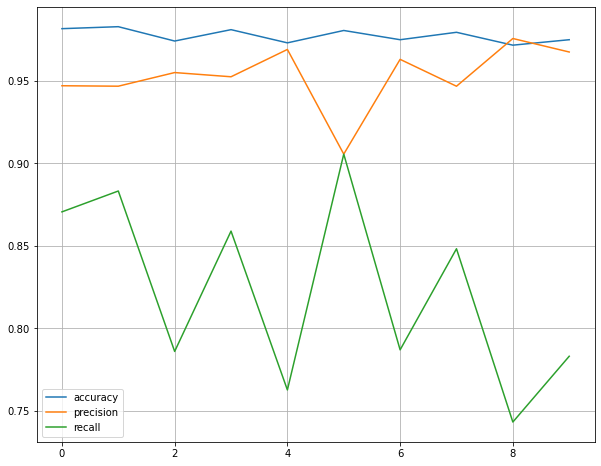

In [18]:
# Plotting above results
# One batch seems enough for MNIST dataset.
# Precision and Recall seem to show a reverse relationship.
plt.figure(figsize=(10,8))
plt.plot(acc,label = 'accuracy')
plt.plot(pre,label = 'precision')
plt.plot(rec,label = 'recall')
plt.legend()
plt.grid()

## 1.3 10 nodes to classify every digit

In [19]:
train_data_10 = train.values.copy()
y = train_data_10.T[0]     # Get the training labels 
X = train_data_10[:,1:]     # Get the training data

test_label = test.values.T[0]     # Get the testing labels 
test_data = test.values[:,1:]     # Get the testing data

In [20]:
# Generate weights and bias from uniform distribution
weights_matrix = np.random.rand(10,784)-0.5
bias_matrix = np.random.rand(10) - 0.5

In [21]:
def Test(testing_data,labels,w,b):
    assert len(testing_data) == len(labels)
    accuracy = 0.0
    precision = 0.0
    recall = 0.0
    confusion_matrix = np.zeros((10,10)).astype('int')
    for i in range(testing_data.shape[0]):
        
        label = np.zeros(10)
        label[labels[i]] = 1
        activation = weights_matrix.dot(X[i]) + bias_matrix
        confusion_matrix[labels[i]][np.argmax(activation)] += 1
    
    accuracy = np.diagonal(confusion_matrix).sum() / testing_data.shape[0]
    print("Accuracy:\t"+str(accuracy))
    print(confusion_matrix)

In [22]:
# Training
lr = 0.01
for i in range(X.shape[0]):
    label = np.zeros(10)
    Xi = X[i]
    yi = y[i]
    label[yi] = 1
    activation = weights_matrix.dot(X[i]) + bias_matrix
    if yi != np.argmax(activation):
        weights_matrix[yi] = weights_matrix[yi] + lr*Xi
        weights_matrix[np.argmax(activation)] = weights_matrix[np.argmax(activation)] - lr*Xi
        bias_matrix[yi] = bias_matrix[yi] + lr
        bias_matrix[np.argmax(activation)] = bias_matrix[np.argmax(activation)] - lr
    if (i+1) % 10000 == 0:
        print('Batch',(i+1) //10000)
        Test(X,y,weights_matrix,bias_matrix)
        print('\n')


Batch 1
Accuracy:	0.8409166666666666
[[5604    0  112   14   19   85   42   13   27    7]
 [   3 6387  196   32    7   55   15   13   31    3]
 [  40   29 5489   76   54   28  101   56   62   23]
 [  24   14  389 5209    2  363   24   42   32   32]
 [  10   55   94   23 5189   80   83   37   44  227]
 [ 147   44  103  204   43 4609   67   14  138   52]
 [  49   14  155    9  134  184 5321    4   47    1]
 [  46   53  448   63  102   31    3 5230   21  268]
 [  41  250  953  378   37  719   17   23 3342   91]
 [  28   89   41  182  593  260    2  604   75 4075]]


Batch 2
Accuracy:	0.86375
[[5560    8   21    9    9  190   55    1   51   19]
 [   2 6631   22    9    4   11    7    6   32   18]
 [  45  302 4954   76   54   21  115   51  299   41]
 [  41  192  172 4779    4  204   54   44  491  150]
 [  25   67   36    3 4796   14  114    4  179  604]
 [  77  176   49  164   34 4233  160   10  397  121]
 [  33   60   37    4   11   78 5660    2   28    5]
 [  28   92  117    9   60   14  

In [23]:
# Testing
# Two digits are misclassified
for d in range(10):
    print('prediction is:',np.argmax(weights_matrix.dot(test_data[d]) + bias_matrix))
    print('True label is:',test_label[d],'\n')

prediction is: 7
True label is: 7 

prediction is: 5
True label is: 2 

prediction is: 1
True label is: 1 

prediction is: 0
True label is: 0 

prediction is: 4
True label is: 4 

prediction is: 1
True label is: 1 

prediction is: 4
True label is: 4 

prediction is: 9
True label is: 9 

prediction is: 6
True label is: 5 

prediction is: 9
True label is: 9 



## 1.4 Sigmoid Prediction

In [24]:
# All example digits are correctly predicted.
print('The closer the prediction is to 1, the more it is likely to be 7, vice versa.')
for d in range(10):
    print('Simoid prediction is:',p.predict_sigmoid(test_data[d]))
    print('True label is:',test_label[d],'\n')

The closer the prediction is to 1, the more it is likely to be 7, vice versa.
Simoid prediction is: 1
True label is: 7 

Simoid prediction is: 0
True label is: 2 

Simoid prediction is: 0
True label is: 1 

Simoid prediction is: 0
True label is: 0 

Simoid prediction is: 0
True label is: 4 

Simoid prediction is: 0
True label is: 1 

Simoid prediction is: 0
True label is: 4 

Simoid prediction is: 0
True label is: 9 

Simoid prediction is: 0
True label is: 5 

Simoid prediction is: 0
True label is: 9 



|Perceptron|highest accuracy on|training set and corresponding|precision and recall||
|------|------|------|------||
||Accuracy|Precision|Recall|Result reached at|
|p uniform|0.9818|0.9478787878787879|0.8737430167597765|6/6|
|p normal|0.9823666666666667|0.9413459908459061|0.8863527533918595|6/6|
|p batch|0.98155|0.955975954738331|0.863048683160415|6/12|
|p 10 nodes|0.8785833333333334|||5/6|